In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import datetime
import seaborn as sns

In [63]:
logins = pd.read_json('logins.json', convert_dates=True)
resampled = logins.resample('15T',on='login_time').count()
df = resampled.copy()
date = []
time = []
for i in resampled.index:
    date.append(i.strftime('%Y-%m-%d'))
    time.append(i.strftime('%H:%M:%S'))
resampled

login_time
login_time                     
1970-01-01 20:00:00           2
1970-01-01 20:15:00           6
1970-01-01 20:30:00           9
1970-01-01 20:45:00           7
1970-01-01 21:00:00           1
1970-01-01 21:15:00           4
1970-01-01 21:30:00           0
1970-01-01 21:45:00           4
1970-01-01 22:00:00           9
1970-01-01 22:15:00           8
1970-01-01 22:30:00           1
1970-01-01 22:45:00           3
1970-01-01 23:00:00          16
1970-01-01 23:15:00          13
1970-01-01 23:30:00          14
1970-01-01 23:45:00          15
1970-01-02 00:00:00          10
1970-01-02 00:15:00          18
1970-01-02 00:30:00          12
1970-01-02 00:45:00          13
1970-01-02 01:00:00           9
1970-01-02 01:15:00           8
1970-01-02 01:30:00          10
1970-01-02 01:45:00           6
1970-01-02 02:00:00           7
1970-01-02 02:15:00          18
1970-01-02 02:30:00          12
1970-01-02 02:45:00           6
1970-01-02 03:00:00          12
1970-01-02 03:15:00           5
...                         ...
1970-04-13 11:30:00          13
1970-04-13 11:45:00           7
1970-04-13 12:00:00           6
1970-04-13 12:15:00          11
1970-04-13 12:30:00           8
1970-04-13 12:45:00          11
1970-04-13 13:00:00           5
1970-04-13 13:15:00           4
1970-04-13 13:30:00           6
1970-04-13 13:45:00           5
1970-04-13 14:00:00           4
1970-04-13 14:15:00           8
1970-04-13 14:30:00           8
1970-04-13 14:45:00          12
1970-04-13 15:00:00          10
1970-04-13 15:15:00           4
1970-04-13 15:30:00           3
1970-04-13 15:45:00           2
1970-04-13 16:00:00           7
1970-04-13 16:15:00           8
1970-04-13 16:30:00           4
1970-04-13 16:45:00           3
1970-04-13 17:00:00           5
1970-04-13 17:15:00           3
1970-04-13 17:30:00           9
1970-04-13 17:45:00           5
1970-04-13 18:00:00           5
1970-04-13 18:15:00           2
1970-04-13 18:30:00           7
1970-04-13 18:45:00           6

[9788 rows x 1 columns]

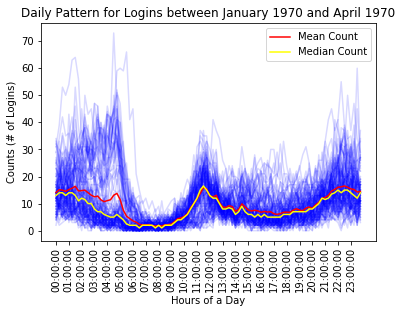

In [61]:
xaxis_ticks = logins.resample('H', on='login_time').count()
ticks = []
for i in xaxis_ticks.index:
    ticks.append(i.strftime('%H:%M:%S'))
ticks = set(ticks)
df.index = [date, time]
df.index.names = ['day', 'time']
for i in df.index.get_level_values('day').unique()[1:]:
    subset = df.loc[i]
    plt.plot(subset, alpha = 0.15, c = 'blue')
time = df.reset_index().drop(columns = 'day')
plt.plot(time.groupby('time').mean(), c= 'red', label = 'Mean Count')
plt.plot(time.groupby('time').median(), c= 'yellow', label = 'Median Count')
plt.xticks([i for i in ticks], rotation= 90)
plt.xlabel('Hours of a Day')
plt.ylabel('Counts (# of Logins)')
plt.title('Daily Pattern for Logins between January 1970 and April 1970')
plt.legend()
plt.show()


In [139]:
with open('ultimate_data_challenge.json') as json_data:
    data = json.load(json_data)
data = pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [140]:
data.signup_date = pd.to_datetime(data.signup_date, format='%Y-%m-%d')
data.last_trip_date = pd.to_datetime(data.last_trip_date, format='%Y-%m-%d')
data.avg_rating_by_driver = data.avg_rating_by_driver.fillna(np.mean(data.avg_rating_by_driver))
data.avg_rating_of_driver = data.avg_rating_of_driver.fillna(np.mean(data.avg_rating_of_driver))
data.phone = data.phone.fillna('Other')
data.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [147]:
delta = datetime.timedelta(days = 30)
status = []
for i in data.last_trip_date:
    if i < np.max(data.last_trip_date - delta):
        status.append('passive')
    else:
        status.append('active')

In [149]:
data['status'] = status
data.groupby('status').mean()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
status                                                                     
active   5.114788              4.762801              4.593679   1.073809   
passive  6.207939              4.787415              4.606309   1.075339   

         surge_pct  trips_in_first_30_days  ultimate_black_user  weekday_pct  
status                                                                        
active    9.152797                3.306318             0.505052    61.389034  
passive   8.666739                1.658482             0.299942    60.647032

In [153]:
data.groupby('phone').mean()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
phone                                                                      
Android  5.978743              4.784120              4.622427   1.071718   
Other    7.225859              4.815239              4.611237   1.046338   
iPhone   5.701441              4.775144              4.592384   1.076412   

         surge_pct  trips_in_first_30_days  ultimate_black_user  weekday_pct  
phone                                                                         
Android   8.540401                1.934962             0.320996    60.403202  
Other     5.620455                2.396465             0.611111    66.218687  
iPhone    9.020797                2.425944             0.398762    61.092612

In [154]:
data.groupby('city').mean()

avg_dist  avg_rating_by_driver  avg_rating_of_driver  \
city                                                                   
Astapor         5.427940              4.798780              4.625523   
King's Landing  5.976596              4.852865              4.693643   
Winterfell      5.980153              4.731117              4.544608   

                avg_surge  surge_pct  trips_in_first_30_days  \
city                                                           
Astapor          1.086522  10.140305                1.948651   
King's Landing   1.070707   9.966979                2.463672   
Winterfell       1.068194   7.449927                2.431179   

                ultimate_black_user  weekday_pct  
city                                              
Astapor                    0.391738    60.370050  
King's Landing             0.415202    63.232290  
Winterfell                 0.350146    60.318936

In [162]:
data[['phone', 'status']].pivot_table(columns='phone',index = 'status', aggfunc=len, margins = True)

phone    Android  Other  iPhone    All
status                                
active      3146    133   15525  18804
passive    11876    263   19057  31196
All        15022    396   34582  50000

In [163]:
data[['city', 'status']].pivot_table(columns='city',index = 'status', aggfunc=len, margins = True)

city     Astapor  King's Landing  Winterfell    All
status                                             
active      4228            6363        8213  18804
passive    12306            3767       15123  31196
All        16534           10130       23336  50000

In [161]:
np.sum(data.status == 'active')/len(data.status)

0.37608

In [164]:
data.signup_date

0       2014-01-25
1       2014-01-29
2       2014-01-06
3       2014-01-10
4       2014-01-27
5       2014-01-09
6       2014-01-24
7       2014-01-28
8       2014-01-21
9       2014-01-03
10      2014-01-13
11      2014-01-06
12      2014-01-15
13      2014-01-29
14      2014-01-27
15      2014-01-15
16      2014-01-11
17      2014-01-12
18      2014-01-28
19      2014-01-02
20      2014-01-31
21      2014-01-09
22      2014-01-24
23      2014-01-21
24      2014-01-19
25      2014-01-02
26      2014-01-16
27      2014-01-19
28      2014-01-19
29      2014-01-27
           ...    
49970   2014-01-16
49971   2014-01-12
49972   2014-01-12
49973   2014-01-01
49974   2014-01-05
49975   2014-01-11
49976   2014-01-21
49977   2014-01-06
49978   2014-01-17
49979   2014-01-24
49980   2014-01-05
49981   2014-01-26
49982   2014-01-21
49983   2014-01-27
49984   2014-01-26
49985   2014-01-26
49986   2014-01-21
49987   2014-01-27
49988   2014-01-20
49989   2014-01-24
49990   2014-01-13
49991   2014

In [176]:
classes = data.status
features = data.iloc[:,:-1]
city = {"King's Landing": 1, 'Astapor': 2, 'Winterfell':3}
phone = {'iPhone':1, 'Android':2, 'Other':3}
features = features.drop(columns=['last_trip_date', 'signup_date'])
features.city = features.city.map(city)
features.phone = features.phone.map(phone)
features.ultimate_black_user = features.ultimate_black_user.astype(int)
features

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  city  \
0          3.67                   5.0              4.700000       1.10     1   
1          8.26                   5.0              5.000000       1.00     2   
2          0.77                   5.0              4.300000       1.00     2   
3          2.36                   4.9              4.600000       1.14     1   
4          3.13                   4.9              4.400000       1.19     3   
5         10.56                   5.0              3.500000       1.00     3   
6          3.95                   4.0              4.601559       1.00     2   
7          2.04                   5.0              5.000000       1.00     3   
8          4.36                   5.0              4.500000       1.00     3   
9          2.37                   5.0              4.601559       1.00     3   
10         4.28                   4.9              5.000000       1.00     3   
11         3.81                   5.0              4.000000       1.00     3   
12        20.29                   5.0              4.601559       1.00     3   
13         3.04                   5.0              4.000000       1.38     1   
14        26.01                   5.0              4.601559       1.00     2   
15        13.20                   5.0              4.601559       1.00     3   
16        10.86                   3.0              5.000000       1.00     1   
17         2.38                   4.8              3.900000       1.00     1   
18         6.83                   4.8              4.600000       1.21     1   
19        12.08                   5.0              5.000000       1.17     1   
20         2.53                   3.0              4.601559       1.00     3   
21         3.31                   5.0              4.601559       1.00     2   
22        11.47                   5.0              4.601559       1.00     3   
23         7.74                   5.0              5.000000       1.00     1   
24         2.10                   4.7              4.500000       1.02     2   
25        14.48                   5.0              4.601559       1.00     3   
26         1.66                   5.0              4.000000       1.00     2   
27         3.05                   5.0              5.000000       1.05     3   
28         5.97                   5.0              4.601559       1.50     3   
29        11.25                   5.0              4.000000       1.00     2   
...         ...                   ...                   ...        ...   ...   
49970      5.62                   5.0              4.300000       1.00     3   
49971      4.69                   5.0              4.601559       1.00     1   
49972      4.60                   3.5              4.000000       1.25     3   
49973      4.07                   5.0              4.000000       1.00     2   
49974      4.63                   5.0              5.000000       2.00     3   
49975      2.18                   4.8              3.900000       1.03     3   
49976      2.39                   4.0              2.000000       1.00     1   
49977      8.71                   5.0              5.000000       1.00     2   
49978      6.02                   5.0              4.500000       1.00     3   
49979      3.81                   4.8              4.000000       1.00     3   
49980     14.42                   5.0              4.601559       1.00     2   
49981      5.49                   5.0              4.000000       1.00     2   
49982     15.23                   5.0              5.000000       1.00     1   
49983     30.39                   5.0              1.000000       1.00     3   
49984      3.50                   5.0              4.601559       1.00     3   
49985      1.38                   5.0              4.601559       1.00     2   
49986      0.52                   5.0              4.000000       1.00     3   
49987      4.24                   4.0              4.600000       1.00     3   
49988  

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(features, classes, random_state = 36, test_size = 0.25)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))
print(accuracy_score(y_test, y_pred))
for i, j in zip(features.columns, rf.feature_importances_):
    print(i,j)


0.74136
0.9814666666666667
0.74136
avg_dist 0.29749675774126383
avg_rating_by_driver 0.10364363903250254
avg_rating_of_driver 0.0816781638943126
avg_surge 0.08237556570075785
city 0.0743815103877101
phone 0.03831529688193349
surge_pct 0.09333612002358363
trips_in_first_30_days 0.07520980341580778
ultimate_black_user 0.025580700681223957
weekday_pct 0.1279824422409042
